# 1 Details on Data

In [1]:
from pandas import read_csv

# perform for every race
perform = read_csv('./data/performance.txt', sep=':', encoding='utf-8')
# url 
horse = read_csv('./data/url_horse.txt', sep=':', encoding='utf-8')
jockey = read_csv('./data/url_jockey.txt', sep=':', encoding='utf-8')
trainer = read_csv('./data/url_trainer.txt', sep=':', encoding='utf-8')

## 1.1 Performance

Performance records the result of each race. Generally speaking, each competetion contains around 10 races, with around 10 jockeys riding on horses train. 

<img src="./pic/race.png" width="60%" height="60%">



- Race Date: 比赛日期
- Race No.: 场次号
- Race Course: 赛道
- Distance: 赛程
- Field Going: 场地情况
- Race Name: 赛名
- Course Type: 赛道类型
- Race Money: 单场奖金
- Pla.: 赛中名次
- Horse No.: 赛中马号
- Horse: 马名
- Jockey: 骑士
- Trainer: 练马师
- Act. Wt.: 实际负磅
- Declare. Horse Wt.: 排位体重 
- Dr.: 档位
- LBW: 头马距离
- Running Position: 沿途走位，i.e. 名词变化
- Finish Time(min): 完成时间（分钟的部分）
- Finish Time(sec): 完成时间（秒的部分）
- Win Odds: 独赢赔率

In [2]:
perform.head(10)

,Race Date,Race No.,Race Course,Distance,Field Going,Race Name,Course Type,Race Money,Pla.,Horse No.,...,Jockey,Trainer,Act. Wt.,Declare. Horse Wt.,Dr.,LBW,Running Position,Finish Time(min),Finish Time(sec),Win Odds
0,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",1,2,...,潘頓,賀賢,135,1200,8,-,10 11 11 1,1,22.80,2.6
1,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",2,5,...,布文,告東尼,129,1206,12,1-3/4,13 13 14 2,1,23.06,8.5
2,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",3,3,...,何澤堯,蘇偉賢,134,1230,6,2-1/2,9 10 10 3,1,23.20,7.4
3,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",4,6,...,蘇兆輝,黎昭昇,127,1093,10,3,12 12 12 4,1,23.26,42.0
4,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",5,7,...,希威森,苗禮德,126,1225,3,3-1/4,2 3 3 5,1,23.33,6.0
5,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",6,14,...,波健士,丁冠豪,115,1037,7,4-1/4,4 8 9 6,1,23.48,21.0
6,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",7,1,...,田泰安,文家良,135,1119,2,4-1/4,7 5 4 7,1,23.48,21.0
7,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",8,11,...,周俊樂,葉楚航,121,1110,4,4-1/4,8 7 6 8,1,23.48,39.0
8,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",9,13,...,麥利奧,容天鵬,120,1081,11,5-3/4,11 9 8 9,1,23.73,47.0
9,2022/12/18,1,ST,第五班 - 1400米 - (40-0),好地,六福珠寶HEXICON讓賽,草地 - C+3 賽道,"HK$ 810,000",10,8,...,潘明輝,徐雨石,124,1224,1,6-1/4,3 1 1 10,1,23.79,38.0


## 1.2 Url 

Url can be used to further acquire more data on entities of interest.

The table only contains 2 fields, entity and its url.

In [3]:
horse.head(), jockey.head(), trainer.head()

(        horse                                                url
 0  喜悅精靈(E388)  /racing/information/Chinese/Horse/Horse.aspx?H...
 1  勇敢動力(D153)  /racing/information/Chinese/Horse/Horse.aspx?H...
 2  合夥贛勁(D051)  /racing/information/Chinese/Horse/Horse.aspx?H...
 3    安寶(E407)  /racing/information/Chinese/Horse/Horse.aspx?H...
 4   創高峰(D136)  /racing/information/Chinese/Horse/Horse.aspx?H...,
   jockey                                                url
 0     潘頓  /racing/information/Chinese/Jockey/JockeyProfi...
 1     布文  /racing/information/Chinese/Jockey/JockeyProfi...
 2    何澤堯  /racing/information/Chinese/Jockey/JockeyProfi...
 3    蘇兆輝  /racing/information/Chinese/Jockey/JockeyProfi...
 4    希威森  /racing/information/Chinese/Jockey/JockeyProfi...,
   trainer                                                url
 0      賀賢  /racing/information/Chinese/Trainers/TrainerPr...
 1     告東尼  /racing/information/Chinese/Trainers/TrainerPr...
 2     蘇偉賢  /racing/information/Chinese/Trainers/T

# 2 Data Cleansing

I focus on some key fields.

In [10]:
perform = read_csv('./data/performance.txt', sep=':', encoding='utf-8')

In [11]:
""" 1 Cleanse Rank

    - Rule 1. 非法排名: 去除整条记录
        - 由于有些马嗑药、犯规，被取消了比赛资格，因此他们应该被排除在那一场之外。

    - Rule 2. 并列名次: 保留名次，去除其他信息
        - 例如: 【2 平頭馬】 -> 【2】

"""

print('Before: ', perform['Pla.'].nunique())

# Rule 2
perform['Pla.'] = perform['Pla.'].apply(lambda x: x.replace(' 平頭馬', ''))

# Rule 1
perform = perform[
            perform['Pla.'].str.contains('|'.join([str(i) for i in list(range(10))]))
          ].reset_index(drop=True) \

# Transform Data Type
perform['Pla.'] = perform['Pla.'].astype(int)

print('After: ', (perform['Pla.'].nunique()))

Before:  45
After:  14


In [12]:
""" 2 Course: [草地]，或 [全天候跑道]
    3 Distance: xxx米
"""

import re

# Course
perform['Course Type'] = perform['Course Type'].apply(lambda x: x.split(' - ')[0])

# Distance
perform['Distance'] = perform['Distance'].apply(lambda x: (x.split(' - ')[1])[:-1])
perform['Distance'] = perform['Distance'].astype(int)

<AxesSubplot:>

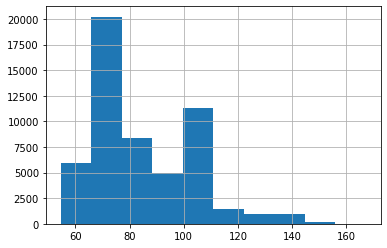

In [13]:
""" 4 Finish Time: 转化为秒
"""

perform['Finish Time'] = perform['Finish Time(min)'].astype(int)*60 \
                              + perform['Finish Time(sec)'].astype(float)

perform['Finish Time'].hist()

In [14]:
""" 5 Champion of Each Race?
"""

perform['is_champ'] = perform['Pla.'].apply(lambda x: 1 if x==1 else 0)

perform['is_champ'].value_counts()

0    49904
1     4532
Name: is_champ, dtype: int64

In [15]:
""" 6 Filter out Fields with Race Key    
"""

perform['race_key'] = perform['Race Date'].astype(str)+ '_' + perform['Race No.'].astype(str)

perform = perform[['race_key', 'Race Date'
                   , 'Dr.', 'Distance', 'Field Going', 'Course Type'
                   , 'Act. Wt.', 'Declare. Horse Wt.', 'Win Odds', 'Horse', 'Jockey', 'Trainer'
                   , 'is_champ', 'Pla.', 'Finish Time']]

cols = ['_'.join(item.replace('.', '').lower().split(' ')) for item in perform.columns.tolist()]

perform.columns = cols
perform = perform.sort_values(by=['race_key', 'pla'], ascending=True)

perform.head()

,race_key,race_date,dr,distance,field_going,course_type,act_wt,declare_horse_wt,win_odds,horse,jockey,trainer,is_champ,pla,finish_time
53437,2015/04/22_1,2015/04/22,2,1000,好地至快地,草地,120,1186,7.3,有情風(N139),薛寶力,吳定強,1,1,57.37
53438,2015/04/22_1,2015/04/22,3,1000,好地至快地,草地,132,1022,6.1,樂趣(S150),韋達,霍利時,0,2,57.53
53439,2015/04/22_1,2015/04/22,5,1000,好地至快地,草地,121,1085,48.0,穩佔先機(N359),連達文,苗禮德,0,3,57.78
53440,2015/04/22_1,2015/04/22,7,1000,好地至快地,草地,127,1211,7.8,上浦勇將(P285),田泰安,徐雨石,0,4,57.82
53441,2015/04/22_1,2015/04/22,1,1000,好地至快地,草地,124,1088,14.0,大地王者(L251),黎海榮,李易達,0,5,57.89


In [43]:
""" 7 Transform Data Type

"""

print(perform.info())

perform['dr'] = perform['dr'].astype(int)
perform['declare_horse_wt'] = perform['declare_horse_wt'].astype(float)

perform.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54436 entries, 53437 to 54017
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   race_key          54436 non-null  object 
 1   race_date         54436 non-null  object 
 2   dr                54436 non-null  object 
 3   distance          54436 non-null  int32  
 4   field_going       54436 non-null  object 
 5   course_type       54436 non-null  object 
 6   act_wt            54436 non-null  int64  
 7   declare_horse_wt  54436 non-null  object 
 8   win_odds          54436 non-null  float64
 9   horse             54436 non-null  object 
 10  jockey            54436 non-null  object 
 11  trainer           54436 non-null  object 
 12  is_champ          54436 non-null  int64  
 13  pla               54436 non-null  int32  
 14  finish_time       54436 non-null  float64
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 6.2+ MB
None


,race_key,race_date,dr,distance,field_going,course_type,act_wt,declare_horse_wt,win_odds,horse,jockey,trainer,is_champ,pla,finish_time
53437,2015/04/22_1,2015/04/22,2,1000,好地至快地,草地,120,1186.0,7.3,有情風(N139),薛寶力,吳定強,1,1,57.37
53438,2015/04/22_1,2015/04/22,3,1000,好地至快地,草地,132,1022.0,6.1,樂趣(S150),韋達,霍利時,0,2,57.53
53439,2015/04/22_1,2015/04/22,5,1000,好地至快地,草地,121,1085.0,48.0,穩佔先機(N359),連達文,苗禮德,0,3,57.78
53440,2015/04/22_1,2015/04/22,7,1000,好地至快地,草地,127,1211.0,7.8,上浦勇將(P285),田泰安,徐雨石,0,4,57.82
53441,2015/04/22_1,2015/04/22,1,1000,好地至快地,草地,124,1088.0,14.0,大地王者(L251),黎海榮,李易達,0,5,57.89


# 3 Training, Format, and Baselines

In [44]:
""" Split Data by Date

    We have 517 days of races, with each contains about 10 races.
    The rule for our model to learn is predict future rank based on historical data.
    For the previous 80% days of races, we treat them as training data
    , and view the latest 20% days of races are testing data.

"""

def train_test_split(data, col, perc=0.2):
    time_map = perform[col].drop_duplicates()
    n_dates = time_map.__len__()
    cut_point = int((1-perc)*n_dates)

    train_date, test_date = time_map[:cut_point], time_map[cut_point:]
    train, test = perform.merge(train_date, how='inner'), perform.merge(test_date, how='inner')
    
    return train, test


train, test = train_test_split(perform, 'race_date', 0.1)

perform.shape, train.shape, test.shape

((54436, 15), (48715, 15), (5721, 15))

In [46]:
""" Expected Output: [race_key, dr]

        - race_key: locates the race of interest
        - dr: reveals the winner's course
"""


def racing_champ(df):
    return df[df['pla']==1][['race_key', 'dr']]


target = racing_champ(test)
target

,race_key,dr
0,2022/04/10_1,12
12,2022/04/10_10,11
25,2022/04/10_2,3
37,2022/04/10_3,11
49,2022/04/10_4,5
...,...,...
5661,2023/01/18_4,6
5673,2023/01/18_5,4
5685,2023/01/18_6,7
5697,2023/01/18_7,11


In [53]:
""" Evaluation Metric

    So far, we simply treat the problem as whether we can find the champion or not.
    The metric should reveal this characteristic.
    For future works, we may even consider some ranking metrics like NDCG@k and HitRate@k.

    [Average Precision]: AP measures how effective our model is in finding the champion.
                         It's logic resembles the one in machine learning, taking the formula as:

                         AP = (# of predicted true champion) / (# of predictions)

"""

def AveragePrecision(input, target):
    merge_df = input.merge(target, on='race_key', how='left')
    
    return (merge_df.iloc[:, 1]==merge_df.iloc[:, 2]).sum()/merge_df.shape[0]

In [68]:
""" Baseline 1: Random picking

"""

import random

def countRandomAP(repeat_time=100, return_list=False):
    global test, target

    guess_base = test.sort_values('dr', ascending=False) \
                     .groupby('race_key', as_index=False).first()[['race_key', 'dr']]

    AP = []
    for _ in range(repeat_time):
        iter_guess = guess_base.copy()
        iter_guess['guess'] = iter_guess['dr'].apply(lambda x: random.randint(1, x))
        iter_guess = iter_guess[['race_key', 'guess']]
        AP.append(AveragePrecision(input=iter_guess, target=target))
    
    if return_list:
        return AP

    else:
        return sum(AP)/len(AP)
        

baseline1 = countRandomAP(1000)

print(f'AP of baseline 1, i.e. random guessing {round(baseline1, 4)}.')

AP of baseline 1, i.e. random guessing 0.0852.


In [69]:
""" Baseline 2: Highest Win Odds

    Intuitively, we follow how the majority votes.
    Baseline 2 make guess on the horse and jockey with the lowest win odds, to see if 
"""

df_baseline2 = test.sort_values('win_odds', ascending=True) \
                   .groupby('race_key', as_index=False).first()[['race_key', 'dr']]

baseline2 = AveragePrecision(input=df_baseline2, target=target)

print(f'AP of baseline 2, i.e. lowest wining odds {round(baseline2, 4)}.')

df_baseline2

AP of baseline 2, i.e. lowest wining odds 0.2812.


,race_key,dr
0,2022/04/10_1,12
1,2022/04/10_10,4
2,2022/04/10_2,2
3,2022/04/10_3,10
4,2022/04/10_4,7
...,...,...
475,2023/01/18_4,6
476,2023/01/18_5,5
477,2023/01/18_6,7
478,2023/01/18_7,4


0.28125

In [16]:
"""
# Xs
- Race Date: 比赛日期
- Race No.: 场次号
- Race Course: 赛道 (ST, HV)
- Distance: 赛程
- Field Going: 场地情况
- Course Type: 赛道类型
- Act. Wt.: 实际负磅
- Declare. Horse Wt.: 排位体重 
- Dr.: 档位
- Win Odds: 独赢赔率

- Horse: 马名
- Jockey: 骑士
- Trainer: 练马师

# y
- Pla.: 赛中名次
- Finish Time(min): 完成时间（分钟的部分）
- Finish Time(sec): 完成时间（秒的部分）
"""

import re


perform['race_key'] = perform['Race Date'].astype(str) + perform['Race No.'].astype(str)
perform['Course Type'] = perform['Course Type'].apply(lambda x: ''.join(re.findall(r'(.*?) -', x)))
perform['Finish Time'] = perform['Finish Time(min)'].int*60 + perform['Finish Time(sec)']

In [40]:
perform = perform[perform['Pla.'].str.contains('|'.join([str(i) for i in list(range(10))]))]

In [48]:
# (perform['Course Type'].apply(lambda x: ''.join(re.findall(r'(.*?) -', x)))).value_counts()

perform['Course Type'].value_counts()

草地 - A 賽道      14295
草地 - C 賽道      11057
草地 - B 賽道      10149
草地 - C+3 賽道     9693
全天候跑道           3765
草地 - B+2 賽道     2824
草地 - A+3 賽道     2653
Name: Course Type, dtype: int64